This notebook creates a WT network, then swappes the WT morphologies in the network file for degenerated PD morphologies where part of the dendrites have been removed. The synapses and inputs on the degenerated parts of the morphologies are automatically removed.

In [1]:
import os
from snudda.init import SnuddaInit

# Future location
SNUDDA_DATA_WT = os.path.join("..", "..", "..", "..", "BasalGangliaData/Parkinson/20211105/PD0")
SNUDDA_DATA_PD2 = os.path.join("..", "..", "..", "..", "BasalGangliaData/Parkinson/20211105/PD2")

# My local copy with next version from Alex
SNUDDA_DATA_WT = "/media/psf/KTH/PD20220225/parkinson/20220225/pd0"
SNUDDA_DATA_PD2 = "/media/psf/KTH/PD20220225/parkinson/20220225/pd2"

os.environ["SNUDDA_DATA"] = SNUDDA_DATA_WT
network_path_WT = "WT-network"
network_path_PD2 = "PD2-network"

si = SnuddaInit(struct_def={}, network_path=network_path_WT, random_seed=123)
si.define_striatum(num_dSPN=200, num_iSPN=200, num_FS=4, num_LTS=0, num_ChIN=0,
                    volume_type="cube")
si.write_json()

Using cube for striatum
Neurons for striatum read from /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum
Adding neurons: FS from dir /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/3/parameters.json
Mechanism file not found: /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/3/mechanisms.json
Paramete

No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/ispn/32/parameters.json
Mechanism file not found: /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/ispn/32/mechanisms.json
Parameter file not found: /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/ispn/35/parameters.json
Mechanism file not found: /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/ispn/35/mechanisms.json
Parameter file not found: /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/ispn/34/parameters.json
Mechanism file not found: /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/ispn/34/mechanisms.json
Parameter file not found: /media/psf/KTH

In [2]:
from ipyparallel import Client

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "default"

u_file = os.path.join(os.getcwd(), ".ipython", "profile_default", "security", 
                      "ipcontroller-client.json")
if os.path.exists(u_file):
    rc = Client(url_file=u_file, timeout=120, debug=False)
else:
    print("Warning, running in serial.")
    rc = None

Warning, running in serial.


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path_WT, rc=rc)
sp.place()

Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/0/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/1/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/3/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/2/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/32/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/35/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/34/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/33/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/d

Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/ispn/22/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/ispn/25/parameters.json


In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path_WT, rc=rc)
sd.detect()

Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/0/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/1/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/3/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/2/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/32/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/35/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/34/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/33/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/d

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 41/180 (404 neurons)
Processing hyper voxel : 36/180 (391 neurons)
Processing hyper voxel : 42/180 (368 neurons)
Processing hyper voxel : 71/180 (329 neurons)
Processing hyper voxel : 37/180 (320 neurons)
Processing hyper voxel : 66/180 (275 neurons)
Processing hyper voxel : 72/180 (228 neurons)
Processing hyper voxel : 11/180 (184 neurons)
Processing hyper voxel : 67/180 (171 neurons)
Processing hyper voxel : 40/180 (167 neurons)
Processing hyper voxel : 6/180 (148 neurons)
Processing hyper voxel : 46/180 (105 neurons)
Processing hyper voxel : 12/180 (102 neurons)
Processing hyper voxel : 35/180 (101 neurons)
Processing hyper voxel : 7/180 (92 neurons)
Processing hyper voxel : 70/180 (73 neurons)
Processing hyper voxel : 65/180 (52 neurons)
Processing hyper voxel : 47/180 (52 neurons)
Processing hyper voxel : 76/180 (41 neurons)
Processing hyper voxel : 31/180 (30 neurons)
Processing hyper voxel : 10/18

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path_WT, rc=rc)
sp.prune()

Worker synapses: 10/1483661 (heap size: 18)
Worker synapses: 1483661/1483661 (heap size: 0)
Read 1483661 out of total 1483661 synapses
Read 35 out of total 35 gapJunctions


In [6]:
import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path_WT, 
                 input_config_file="dummy-input.json",   # This file does NOT have correct synapse parameters
                 verbose=False)
si.generate()

Loading 404 neurons with 73718 synapses and 20 gap junctions
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/7/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/28/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/ispn/34/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/ispn/27/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/ispn/17/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/ispn/22/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/17/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/24/parameters.json
Missing parameter.js

Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/3/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/0/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/ispn/9/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/fs/2/parameters.json
Writing spikes to WT-network/input-spikes.hdf5


In [7]:
original_network_file = os.path.join(network_path_WT, "network-synapses.hdf5")
original_input_file = os.path.join(network_path_WT, "input-spikes.hdf5")

new_network_file = os.path.join(network_path_PD2, "network-synapses.hdf5")
new_input_file = os.path.join(network_path_PD2, "input-spikes.hdf5")

In [8]:
from snudda.utils.swap_to_degenerated_morphologies import SwapToDegenerateMorphologies

swap = SwapToDegenerateMorphologies(original_network_file=original_network_file,
                                    new_network_file=new_network_file,
                                    original_snudda_data_dir=SNUDDA_DATA_WT,
                                    new_snudda_data_dir=SNUDDA_DATA_PD2,
                                    original_input_file=original_input_file,
                                    new_input_file=new_input_file)
swap.write_new_network_file()
swap.write_new_input_file()
swap.close()

Loading 404 neurons with 73718 synapses and 20 gap junctions
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/7/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd2/neurons/striatum/dspn/7/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/28/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd2/neurons/striatum/dspn/28/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/ispn/34/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd2/neurons/striatum/ispn/34/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/ispn/27/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd2/neurons/striatum/ispn/27/parameters.json
Missing parameter.jso

Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/35/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd2/neurons/striatum/dspn/35/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/6/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd2/neurons/striatum/dspn/6/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/15/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd2/neurons/striatum/dspn/15/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/23/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd2/neurons/striatum/dspn/23/parameters.json
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/

Writing new network to PD2-network/network-synapses.hdf5
10000 / 73718
20000 / 73718
30000 / 73718
40000 / 73718
50000 / 73718
60000 / 73718
70000 / 73718
73718 / 73718
Keeping 37191 out of 73718 synapses (50.450 %)
20 / 20
Keeping 19 out of 20 gap junctions (95.000 %)
Writing new input data to PD2-network/input-spikes.hdf5
Processed input to dSPN_10 (0), keeping 267 out of 474 inputs (56.33 %)
Processed input to dSPN_14 (1), keeping 235 out of 438 inputs (53.65 %)
Processed input to iSPN_21 (10), keeping 215 out of 360 inputs (59.72 %)
Processed input to iSPN_22 (100), keeping 108 out of 237 inputs (45.57 %)
Processed input to iSPN_24 (101), keeping 89 out of 249 inputs (35.74 %)
Processed input to dSPN_2 (102), keeping 213 out of 325 inputs (65.54 %)
Processed input to dSPN_22 (103), keeping 123 out of 309 inputs (39.81 %)
Processed input to dSPN_22 (104), keeping 130 out of 340 inputs (38.24 %)
Processed input to dSPN_24 (105), keeping 76 out of 346 inputs (21.97 %)
Processed input 

Processed input to dSPN_28 (199), keeping 189 out of 410 inputs (46.10 %)
Processed input to iSPN_2 (2), keeping 70 out of 100 inputs (70.00 %)
Processed input to dSPN_26 (20), keeping 89 out of 298 inputs (29.87 %)
Processed input to iSPN_5 (200), keeping 215 out of 362 inputs (59.39 %)
Processed input to iSPN_27 (201), keeping 47 out of 142 inputs (33.10 %)
Processed input to iSPN_30 (202), keeping 63 out of 136 inputs (46.32 %)
Processed input to iSPN_33 (203), keeping 143 out of 258 inputs (55.43 %)
Processed input to dSPN_4 (204), keeping 147 out of 445 inputs (33.03 %)
Processed input to dSPN_15 (205), keeping 29 out of 223 inputs (13.00 %)
Processed input to dSPN_17 (206), keeping 223 out of 475 inputs (46.95 %)
Processed input to dSPN_29 (207), keeping 257 out of 484 inputs (53.10 %)
Processed input to dSPN_19 (208), keeping 45 out of 288 inputs (15.62 %)
Processed input to dSPN_30 (209), keeping 111 out of 303 inputs (36.63 %)
Processed input to iSPN_3 (21), keeping 112 out of

Processed input to iSPN_6 (3), keeping 145 out of 273 inputs (53.11 %)
Processed input to iSPN_5 (30), keeping 179 out of 337 inputs (53.12 %)
Processed input to dSPN_19 (300), keeping 49 out of 293 inputs (16.72 %)
Processed input to dSPN_20 (301), keeping 35 out of 208 inputs (16.83 %)
Processed input to dSPN_32 (302), keeping 229 out of 441 inputs (51.93 %)
Processed input to iSPN_4 (303), keeping 146 out of 318 inputs (45.91 %)
Processed input to iSPN_7 (304), keeping 105 out of 215 inputs (48.84 %)
Processed input to dSPN_8 (305), keeping 155 out of 365 inputs (42.47 %)
Processed input to dSPN_12 (306), keeping 340 out of 575 inputs (59.13 %)
Processed input to dSPN_21 (307), keeping 301 out of 584 inputs (51.54 %)
Processed input to dSPN_34 (308), keeping 127 out of 420 inputs (30.24 %)
Processed input to iSPN_23 (309), keeping 193 out of 313 inputs (61.66 %)
Processed input to iSPN_15 (31), keeping 40 out of 131 inputs (30.53 %)
Processed input to iSPN_27 (310), keeping 64 out o

Processed input to iSPN_5 (402), keeping 204 out of 352 inputs (57.95 %)
Processed input to iSPN_16 (403), keeping 103 out of 188 inputs (54.79 %)
Processed input to iSPN_0 (41), keeping 91 out of 150 inputs (60.67 %)
Processed input to iSPN_19 (42), keeping 69 out of 222 inputs (31.08 %)
Processed input to dSPN_28 (43), keeping 207 out of 407 inputs (50.86 %)
Processed input to iSPN_17 (44), keeping 120 out of 243 inputs (49.38 %)
Processed input to iSPN_35 (45), keeping 308 out of 464 inputs (66.38 %)
Processed input to dSPN_19 (46), keeping 51 out of 307 inputs (16.61 %)
Processed input to dSPN_34 (47), keeping 133 out of 381 inputs (34.91 %)
Processed input to iSPN_2 (48), keeping 72 out of 100 inputs (72.00 %)
Processed input to iSPN_8 (49), keeping 103 out of 198 inputs (52.02 %)
Processed input to iSPN_34 (5), keeping 139 out of 275 inputs (50.55 %)
Processed input to iSPN_10 (50), keeping 137 out of 229 inputs (59.83 %)
Processed input to iSPN_30 (51), keeping 79 out of 166 inp

Loading 404 neurons with 73718 synapses and 20 gap junctions
Loading 404 neurons with 37191 synapses and 19 gap junctions
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd0/neurons/striatum/dspn/28/parameters.json


<IPython.core.display.Javascript object>


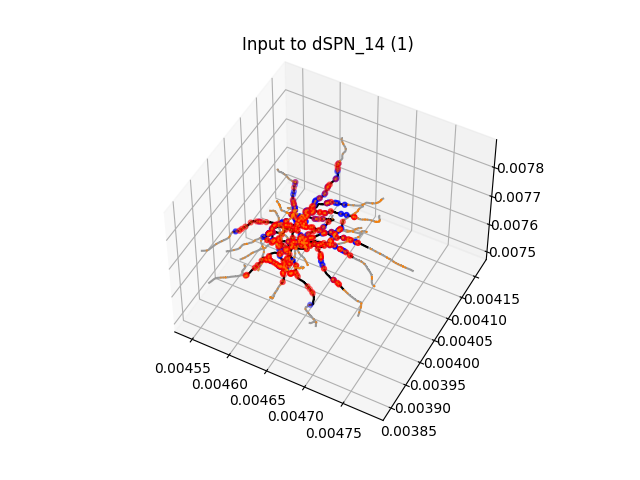

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Plotting 438 external synapses
Missing parameter.json : /media/psf/KTH/PD20220225/parkinson/20220225/pd2/neurons/striatum/dspn/28/parameters.json
Plotting 235 external synapses
Figure written: PD2-network/figures/input-to-1-dSPN_14-and-internal-synapses.png


In [9]:
%matplotlib notebook
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_WT,
                      degenerated_network_path=network_path_PD2)
plot_neuron_id = 1
pd.plot_neuron(neuron_id=plot_neuron_id)